# Homework 2 - Part 2 (c)

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

## Load the data
Load in the Dow Jones, NASDAQ, NYSE and S&P500 data. Although not declared in the instructions, I am only looking at the date and historical close prices.

In [2]:
#loads data from Part 2 (b) into a pandas dataframe
dj_df = pd.read_csv('data/DowJones-HistoricalPrices.csv', usecols=['Date','Close'],index_col='Date') # index_col=False
nasdaq_df = pd.read_csv('data/NASDAQ-HistoricalPrices.csv', usecols=['Date','Close'],index_col='Date')
nyse_df = pd.read_csv('data/NYSE-HistoricalPrices.csv', usecols=['Date','Close'],index_col='Date')
sp500_df = pd.read_csv('data/SP500-HistoricalPrices.csv', usecols=['Date','Close'],index_col='Date')

In [3]:
# check out the data
dj_df.head()

,Close
Date,
2/2/18,25520.96
2/1/18,26186.71
1/31/18,26149.39
1/30/18,26076.89
1/29/18,26439.48


In [4]:
nasdaq_df.head()

,Close
Date,
2/2/18,7240.95
2/1/18,7385.86
1/31/18,7411.48
1/30/18,7402.48
1/29/18,7466.51


In [5]:
nyse_df.head()

,Close
Date,
2/2/18,13085.35
2/1/18,13381.97
1/31/18,13367.96
1/30/18,13375.51
1/29/18,13524.65


In [6]:
sp500_df.head()

,Close
Date,
2/2/18,2762.13
2/1/18,2821.98
1/31/18,2823.81
1/30/18,2822.43
1/29/18,2853.53


## Dow Jones Data

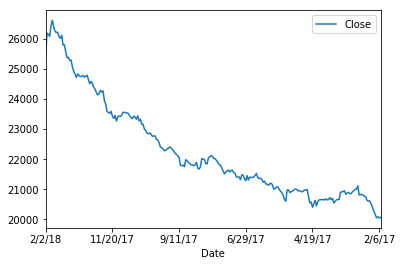

In [7]:
dj_df.plot.line()

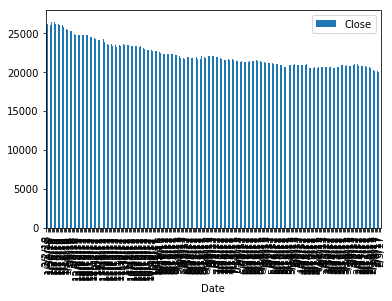

In [8]:
# note - would fix the x-axis labels. Just plotting for visual purposes
dj_df.plot.bar()

## Question 1: Which do you think is a more effective representation and why? Justify with the expressiveness and effectiveness concepts discussed in class as well as perceptual ordering.

The line series chart is much more effective than the bar chart because with this set of data we are looking to show a trend over time, rather than show discoveries by a category, or maybe visualize variables in the data. Line graphs tend to work best for continuous data, whereas bar and column graphs work best for categorical data. In this case, more tweaking needs to be done to clearly see the dates on the x axis as well.

## NASDAQ Data

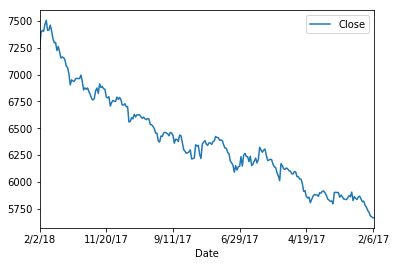

In [9]:
nasdaq_df.plot.line()

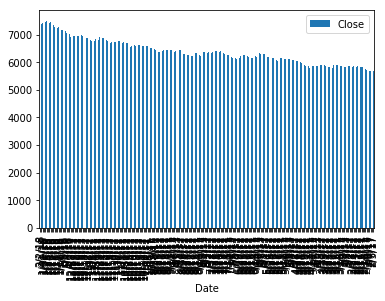

In [10]:
nasdaq_df.plot.bar()

## NYSE Data

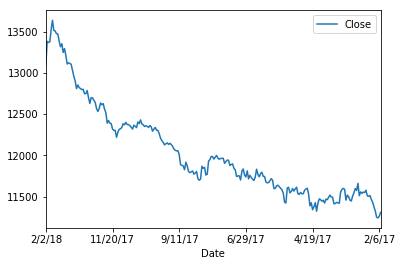

In [11]:
nyse_df.plot.line()

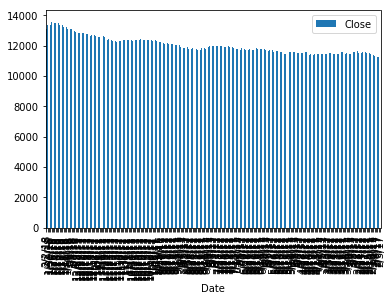

In [12]:
nyse_df.plot.bar()

## SP500 Data

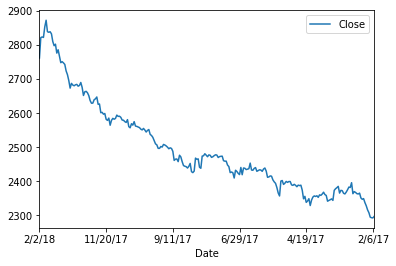

In [13]:
sp500_df.plot.line()

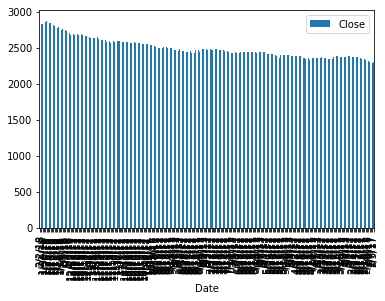

In [14]:
sp500_df.plot.bar()

## Additional Visualizations (3)

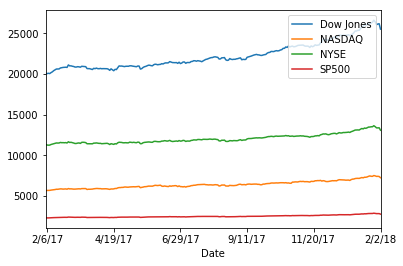

In [15]:
plt.figure()
dj_df.Close.plot(label="Dow Jones")
nasdaq_df.Close.plot(label="NASDAQ")
nyse_df.Close.plot(label="NYSE")
sp500_df.Close.plot(label="SP500")
plt.gca().invert_xaxis()
plt.legend()

### Time series data
For each data set (index), I labeled each on a different color so that it was easy to decipher which index is which. Over all, it is easy to tell that each index is in an upward trend, but it is harder to tell how similar they are since they're not normalized.

In [16]:
# create a new dataframe
new_df = pd.concat([dj_df['Close'], nasdaq_df['Close'], nyse_df['Close'], sp500_df['Close']], axis=1, keys=['Dow', 'NASDAQ', 'NYSE', 'S&P500'])

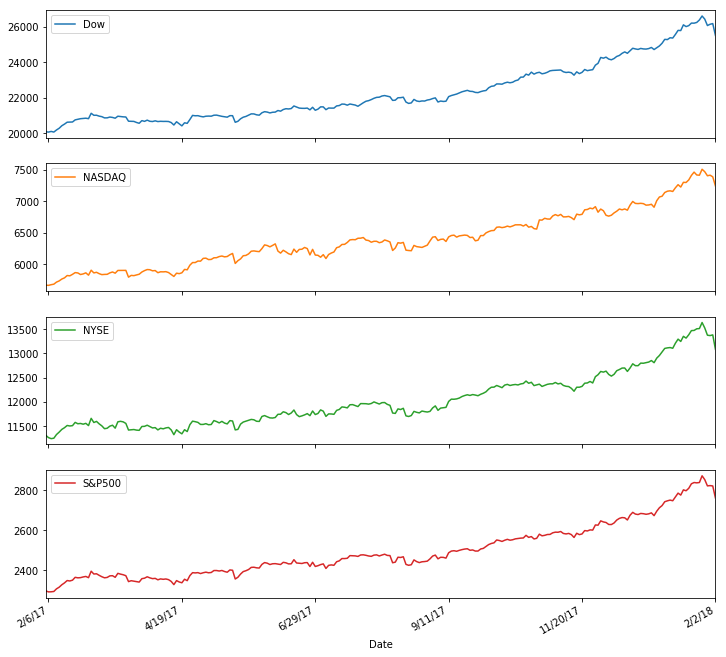

In [17]:
new_df.plot(subplots=True, figsize=(12, 12))
plt.gca().invert_xaxis()
plt.legend(loc='best')

### Small multiples - time series
Again, for each data set (index), I gave each index a different color. In these small multiples, since the y axis is normalized it is much easier to see that the trends are extremely similar in all indexes even though they are on different scales.

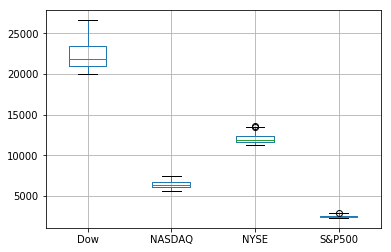

In [18]:
plt.figure();
bp = new_df.boxplot()

### Box and whisker
I didn't choose to change the colors of the box and whisker graph because I didn't see any visual benefit. Here, it is easy to see the difference in ranges and scales between the indexes.

In [19]:
# look at Dow jones data - stats
dj_df.describe()

,Close
count,252.000000
mean,22281.564603
std,1640.336768
min,20052.420000
25%,20953.622500
50%,21790.665000
75%,23412.655000
max,26616.710000


### Table
Using pandas describe function, we can quickly look at some basic statistics of the Dow Jones historical close price, such as the record count, mean, min, and max. Without changing much of the table, this function gives a quick visualization and analysis of the data.

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ed3ba90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f45d3c8>]], dtype=object)

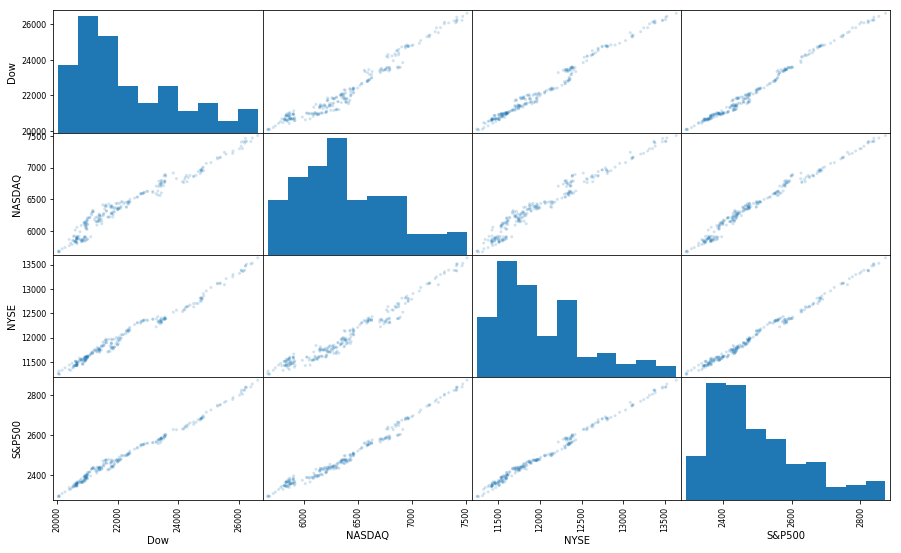

In [20]:
from pandas.plotting import scatter_matrix
%pylab inline
scatter_matrix(new_df, alpha=0.2,figsize=(15, 9)) #diagonal='kde'

### Plotting - Histogram
I chose to plot histograms for the different indexes in order to see if there is a way to tell if one index looks to perform better than another. I didn't find it necessary to add multiple colors since the labels showed the difference between categories (indexes). Along with the histograms, the scatter plot shows a linear relatinoship between the close price and the markets.

## Extra visuals - playing around

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f5fd390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f8be128>]], dtype=object)

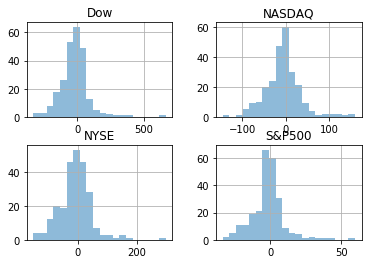

In [21]:
plt.figure()
new_df.diff().hist(alpha=0.5, bins=20)

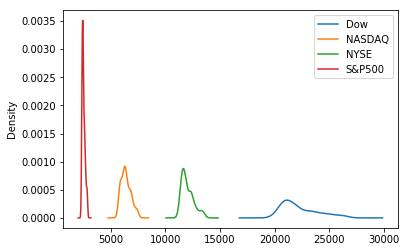

In [22]:
new_df.plot(kind='kde')

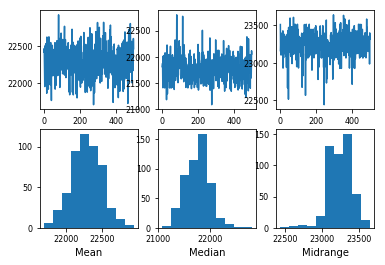

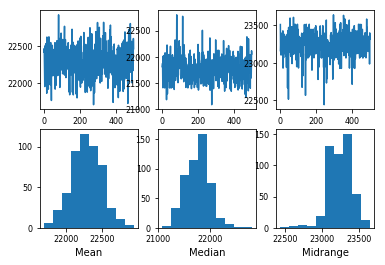

In [23]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(dj_df) #, size=50, samples=500